# Goal: Answer the following questions
### Which countries offer the longest races?
### Which races take the longest to finish on average?

In [234]:
import pandas as pd
import numpy as np
import seaborn as sns
import kagglehub
from kagglehub import KaggleDatasetAdapter
from pathlib import Path

In [235]:
file_path = kagglehub.dataset_download("aiaiaidavid/the-big-dataset-of-ultra-marathon-running")

print("Path to dataset files:", file_path)

Path to dataset files: /Users/ds/.cache/kagglehub/datasets/aiaiaidavid/the-big-dataset-of-ultra-marathon-running/versions/2


In [236]:
df = pd.read_csv(Path(file_path, "TWO_CENTURIES_OF_UM_RACES.csv"))
df=df.dropna()
df=df.drop_duplicates()
df.sample(10)

/var/folders/_w/p__mh4fn0pj6hdp6rksxkw9r0000gn/T/ipykernel_35624/3510621176.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(Path(file_path, "TWO_CENTURIES_OF_UM_RACES.csv"))


,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
4570655,2008,16.-17.02.2008,Le Trail de Paris-Ile de France 80 km (FRA),80km,744,9:48:15 h,Mbda Sport Athletisme,FRA,1969.0,M,M35,8.16,1022247
4744899,2009,08.02.2009,OSJ Jungle Trail 50K Amami (JPN),50km,173,5:29:09 h,*Tokyo,JPN,1971.0,F,W35,9.114,1180166
2477398,2019,08.12.2019,Shancheng 66 Km Ultramarathon (TPE),66km,111,8:27:54 h,高雄鐵人,TPE,1973.0,M,M45,7.797,65526
1367213,2017,27.-29.05.2017,145 mile Grand Union Canal Race (GUCR) (GBR),145mi,66,41:05:00 h,Striders OF Croydon AC,TUR,1975.0,M,M40,5.68,66708
67389,2018,27.-28.01.2018,Zamiec 24h ultramaraton na Skrzyczne (POL),24h,170,81.000 km,Logi-STY-KA,POL,1976.0,M,M40,3.375,58766
1008932,2016,16.07.2016,"Ultra Maraton De Los Cañones, Guachochi 63km (...",63km,364,15:21:14 h,*Cdmx,MEX,1983.0,M,M23,4.103,59564
4666016,2009,19.-20.06.2009,Bighorn Mountain Wild & Scenic 50mi Trail Run ...,50mi,113,13:59:19 h,"*Jackson, WY",USA,1971.0,M,M35,5.752,1248957
4666395,2009,14.06.2009,Self-Transcendence 100-km Lauf Wien (AUT),100km,22,10:37:06 h,*Wien,AUT,1963.0,M,M45,9.418,165692
5389229,2012,10.-11.03.2012,Graveyard 100 km Ultramarathon (USA),100km,14,16:26:13 h,"*Kalispell, MT",USA,1958.0,F,W50,6.084,788657
6188843,2014,13.-14.09.2014,Headlands Hundred 100 Mile Endurance Run (USA),100mi,40,31:12:11 h,"*Wildomar, CA",USA,1962.0,M,M50,5.158,27881


In [237]:
df.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete club                  object
Athlete country               object
Athlete year of birth        float64
Athlete gender                object
Athlete age category          object
Athlete average speed         object
Athlete ID                     int64
dtype: object

## Data Cleaning

#### Standardizing 'Event distance/length' column

In [238]:
# Find unique valies for 'Event distance/length'
unique_distances = df['Event distance/length'].unique()
pd.Series(unique_distances)

0                     50km
1                       6h
2                   63.9km
3                     50mi
4                     28mi
               ...        
1542        303km/4Etappen
1543    2935.8mi/64Etappen
1544        344km/5Etappen
1545        330km/5Etappen
1546        355km/5Etappen
Length: 1547, dtype: object

In [239]:
# find unique 2-digit suffixes for distance
suffixes = df['Event distance/length'].str.split('/').str.get(0).str[-2:]
suffixes.unique().shape # -> 29

(29,)

In [240]:
# Filter out races where distance isn't recorded in miles ('mi') or kilometers ('km')
df = df[df['Event distance/length'].str.endswith(("mi", "km"))].reset_index()
df.shape

(4059693, 14)

In [241]:
# Filtering out distances that can't be converted to a number
before_row_count = df.shape[0]
df = df[~pd.to_numeric(df['Event distance/length'].str[:-2], errors='coerce').isna()]
print(before_row_count - df.shape[0], "rows filtered out") # -> 25

25 rows filtered out


In [242]:
# creating new column that standardizes event distances to miles
condition = df['Event distance/length'].str.endswith("km")

df['Event distance (miles)'] = np.where(
        condition,
        pd.to_numeric(df['Event distance/length'].str[:-2]) * 0.621371, 
        pd.to_numeric(df['Event distance/length'].str[:-2])
    ).round(2)

df = df[['Event name', 'Year of event', 'Event distance/length', 'Event distance (miles)']]
df.sample(15)

,Event name,Year of event,Event distance/length,Event distance (miles)
3010266,La SainteLyon 70 km (FRA),2012,70km,43.50
1224638,Trail des légendes de Brocéliande (FRA),2019,52km,32.31
3376354,Penyagolosa Trail MiM-63 (ESP),2014,63km,39.15
2915126,Ultra Desafio 50 Milhas - 1ª Etapa Campinas (BRA),2012,50mi,50.00
255372,Ultra Mazury - U100 (POL),2018,98.4km,61.14
2091571,Sunmart Texas Trail Endurance Run 50 Km (USA),2003,50km,31.07
3434756,Doñana Trail Marathon Sevilla-El Rocío (ESP),2014,73km,45.36
946816,Javelina Jundred 100 Mile Endurance Run (USA),2017,100mi,100.00
1341611,Antelope Canyon 55 Km (USA),2020,55km,34.18
3818137,100 km Lauf Biel (SUI),1982,100km,62.14


In [243]:
# get country code from 'Event name' field
df['code'] = df['Event name'].str[-4:-1]
df.sample(15)

,Event name,Year of event,Event distance/length,Event distance (miles),code
2081268,Two Oceans Marathon (RSA),2002,56km,34.80,RSA
3599877,Tahoe Rim Trail 100M Endurance Run (USA),2015,100mi,100.00,USA
1798860,Dick Collins Firetrails 50 Mile (USA),2022,50mi,50.00,USA
512107,Matterhorn Ultraks (SUI),2016,46km,28.58,SUI
2723562,Swiss Alpine Marathon (SUI),2010,78km,48.47,SUI
1861546,Comrades Marathon - Up Run (RSA),1996,87km,54.06,RSA
2390953,"100 km del Passatore, Firenze-Faenza (ITA)",2007,100km,62.14,ITA
3361326,Comrades Marathon - Down Run (RSA),2014,89km,55.30,RSA
3686000,La SaintéLyon 72 km (FRA),2015,72km,44.74,FRA
2870143,RUN Winschoten 100 km (NED),2011,100km,62.14,NED


In [248]:
# map country code to country name
import pycountry

results = []
for country in pycountry.countries:
    results.append([country.name, country.alpha_3])

country_df = pd.DataFrame(results, columns=['country', 'code'])

df = pd.merge(df, country_df, on='code', how='left')
df[df['code'].isna()].shape[0] # -> 0 rows left unmapped

0

## Which countries offer the longest races?

In [260]:
long_races_df = df.groupby('country')['Event distance (miles)'].agg(['mean', 'max'])
long_races_df = long_races_df.sort_values(by='max', ascending=False).head(10)

### Findings, according to our dataset:
- The United States offers the longest ultramarathon at 3085 miles
- 9 countries offer ultramarathons that are 500 miles or more

<Axes: ylabel='max'>

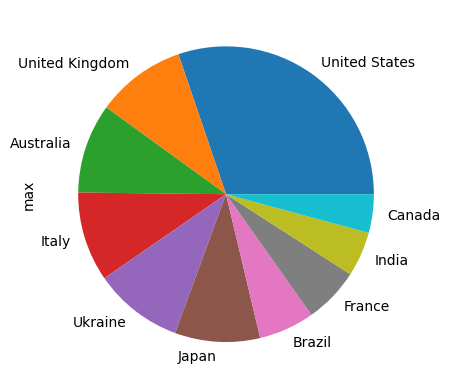

In [263]:
import matplotlib.pyplot as plt

long_races_df['max'].plot(kind='pie')